<h2>ALY6015_SpringA2020_Pragati_Koladiya_Assignment_3</h2>

<p> <b>Week: </b>3</p>
<p> <b>Author:</b> Pragati Koladiya </p> 
<p> <b>Tittle:</b> Assignment 3 </p>


<h1>Part 2 </h1>
<h3>Logistic Regression</h3>
<ul>
    <li>It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. </li>
    <li>In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). </li>
    <li>In other words, the logistic regression model predicts P(Y=1) as a function of X. </li>

In [34]:
#!pip install matplotlib==3.1.0

     |████████████████████████████████| 14.4 MB 4.5 MB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


<h3>Import packages</h3>

In [76]:
import plotly.figure_factory as ff
from imblearn.over_sampling import SMOTE

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

import numpy as np
import os
import pandas as pd
from pylab import rcParams
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

import random
from sklearn.metrics import roc_auc_score,make_scorer,classification_report,roc_curve,auc
#from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

import statsmodels.api as sm
from sklearn import metrics
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC


from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline

<h3>Acquire and load the data</h3>

In [77]:
#read data from google sheets 
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQ_wRU3xxq0tOV4TOBkUwk7JOoqeD6MAJs88Qn00-1436iuVeW7Jppg50fZE6jXbRl_clbAa6Wy-fFs/pub?gid=1833614880&single=true&output=csv"
df = pd.read_csv(data_path)

In [78]:
df.shape

(505, 16)

In [79]:
df.head()

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
0,653,0,25000,1,0,0,0,0,0,1,0,1,0,1,0,0
1,546,0,7000,0,0,0,0,0,0,1,1,1,1,1,0,0
2,463,0,25000,1,0,0,1,0,0,1,1,1,0,1,1,0
3,93,1,124000,0,1,1,1,0,0,0,0,0,1,1,0,0
4,672,1,84000,0,1,0,1,0,0,0,1,0,1,1,0,0


<h1>Data Exploration</h1>

- <p>Checking for missing values</p>

In [80]:
df.isnull().sum()

row                                    0
transaction                            0
salary_usd                             0
is_male                                0
is_married                             0
is_college                             0
is_professional                        0
is_senior                              0
is_employed                            0
is_single_income                       0
children_present                       0
is_renter                              0
lives_in_house                         0
is_english_primary_language            0
previously_disney_customer             0
previous_streaming_service_customer    0
dtype: int64

=> <i>Null values not found</i>

In [200]:
df.dtypes

row                                    int64
transaction                            int64
salary_usd                             int64
is_male                                int64
is_married                             int64
is_college                             int64
is_professional                        int64
is_senior                              int64
is_employed                            int64
is_single_income                       int64
children_present                       int64
is_renter                              int64
lives_in_house                         int64
is_english_primary_language            int64
previously_disney_customer             int64
previous_streaming_service_customer    int64
dtype: object

- <p>Describing quantitative variable</p>

In [202]:
df.describe()

,row,transaction,salary_usd,is_male,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,children_present,is_renter,lives_in_house,is_english_primary_language,previously_disney_customer,previous_streaming_service_customer
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,337.425743,0.186139,58223.762376,0.443564,0.366337,0.308911,0.352475,0.063366,0.029703,0.762376,0.364356,0.605941,0.673267,0.900990,0.075248,0.079208
std,196.318960,0.389604,39098.058320,0.497297,0.482281,0.462502,0.478215,0.243862,0.169935,0.426049,0.481726,0.489132,0.469484,0.298971,0.264052,0.270331
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,338.000000,0.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,506.000000,0.000000,86000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,672.000000,1.000000,124000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- <i>Exploring numerical columns</i>

In [82]:
df['row'].unique()

array([653, 546, 463,  93, 672, 273, 278, 204, 456, 414, 378, 519, 408,
       450, 655, 582, 221,  53, 243, 453, 474, 303, 574, 439, 125, 108,
         6, 372,  13, 102, 625,  86, 440, 477, 412, 137, 294, 542,  28,
       624, 445, 205, 252,  61,  69, 491,  71, 591, 106, 322, 224, 362,
       359, 163, 481, 381, 334, 338, 220, 182,  20, 180, 332, 457, 268,
       271,  97, 598, 466, 391,  66,  84,   1, 434, 279, 569, 418, 162,
       586,  50, 621, 160, 458,  96, 114, 631, 348, 310, 233, 387, 178,
       349,  43, 245, 475, 260, 103, 217, 150, 236, 446, 179, 361, 223,
       511, 352,  89, 242, 375, 560, 124, 139, 640, 532, 231,  67,   4,
       556,  91, 572, 609, 543, 351, 528, 288, 559, 530, 356, 199,  68,
       512, 465,  22, 525, 295, 153, 659, 121,  76, 568, 433, 368, 668,
       249, 343, 656, 128, 427, 154, 225, 144, 379,  90, 632, 470,  11,
       623, 637, 584, 630, 170, 237, 417, 161, 330,  74,  83, 555, 145,
       410, 218, 402, 643,  56, 571, 592, 570,  52, 292, 358, 56

In [83]:
df['salary_usd'].unique()

array([ 25000,   7000, 124000,  84000,  66000,  41000,  35000,  40000,
       116000,  64000,  20000,  68000,  73000,  23000,  30000,   3000,
        13000,  21000,  58000, 102000, 121000,  76000,  78000,  17000,
        28000,  81000,  69000,  61000,   2000,  55000,  63000,  33000,
       101000,  46000,   5000,  45000, 111000,  15000,  79000,  36000,
       114000,   8000,  38000,  50000,  12000,  43000,  74000,  31000,
        10000,  89000, 109000,  83000, 107000,  56000,  96000,  86000,
       106000,  18000,  98000,  71000, 119000,  60000,  48000,      0,
       112000,  88000,  91000,  53000,  99000,  94000,  26000,  51000])

- <i>Exploring Binary columns</i>

In [84]:
df['transaction'].value_counts()

0    411
1     94
Name: transaction, dtype: int64

In [85]:
df['is_male'].value_counts()

0    281
1    224
Name: is_male, dtype: int64

In [86]:
df['is_married'].value_counts()

0    320
1    185
Name: is_married, dtype: int64

In [87]:
df['is_college'].value_counts()

0    349
1    156
Name: is_college, dtype: int64

In [88]:
df['is_professional'].value_counts()

0    327
1    178
Name: is_professional, dtype: int64

In [89]:
df['is_senior'].value_counts()

0    473
1     32
Name: is_senior, dtype: int64

In [90]:
df['is_employed'].value_counts()

0    490
1     15
Name: is_employed, dtype: int64

In [91]:
df['is_single_income'].value_counts()

1    385
0    120
Name: is_single_income, dtype: int64

In [92]:
df['children_present'].value_counts()

0    321
1    184
Name: children_present, dtype: int64

In [93]:
df['is_renter'].value_counts()

1    306
0    199
Name: is_renter, dtype: int64

In [94]:
df['lives_in_house'].value_counts()

1    340
0    165
Name: lives_in_house, dtype: int64

In [95]:
df['is_english_primary_language'].value_counts()

1    455
0     50
Name: is_english_primary_language, dtype: int64

In [96]:
df['previously_disney_customer'].value_counts()


0    467
1     38
Name: previously_disney_customer, dtype: int64

In [97]:
df['previous_streaming_service_customer'].value_counts()


0    465
1     40
Name: previous_streaming_service_customer, dtype: int64

<h3>Feature Selection</h3>

- <i>It helps to identify the import features from the dataset by providing scores</i>

In [98]:
#X = data.iloc[:,0:20]  #independent columns
#y = data.iloc[:,-1]    #target column i.e price range

X =df.iloc[:,df.columns != 'transaction' ]
y =df.transaction
X.head()

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Disney','Score']  #naming the dataframe columns
print(featureScores.nlargest(16,'Score'))  #print 10 best features


                                 Disney         Score
1                            salary_usd  6.019215e+06
3                            is_married  5.034928e+01
10                            is_renter  2.946581e+01
5                       is_professional  2.112519e+01
4                            is_college  1.859386e+01
8                      is_single_income  1.312086e+01
13           previously_disney_customer  1.091485e+01
11                       lives_in_house  7.544560e+00
0                                   row  4.478699e+00
7                           is_employed  3.430657e+00
14  previous_streaming_service_customer  3.423151e+00
2                               is_male  2.227969e+00
6                             is_senior  7.895765e-01
12          is_english_primary_language  7.745896e-01
9                      children_present  2.020649e-02


- <i>Graphical representaion of feature importance for predicting attrition</i>

[0.14172116 0.42105809 0.03368901 0.05770788 0.04510742 0.0295991
 0.00965765 0.00196342 0.05126074 0.03233819 0.08615741 0.02258269
 0.01857111 0.02611394 0.02247217]


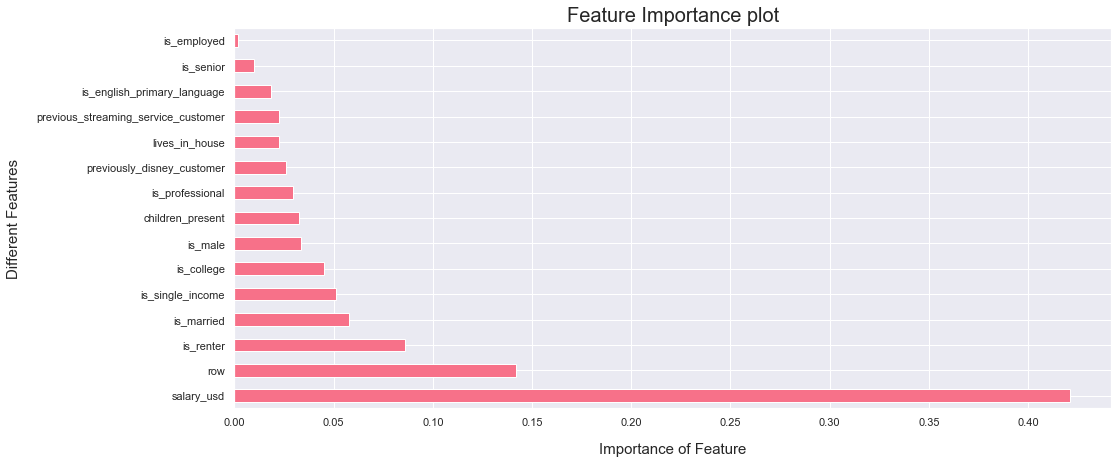

In [99]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.set(style='whitegrid')
sns.set(palette='husl')


feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(16).plot(kind='barh')

plt.xlabel("Importance of Feature", labelpad = 15, fontsize=15)
plt.ylabel("Different Features", labelpad = 15, fontsize=15);
plt.title("Feature Importance plot", fontsize=20)

plt.show()

=> After observing the above graph features like is_male, children_present,previously_disney_customer and previous_streaming_service_customer are not having much influence on the transaction of Disney subscription. So, I have decided to drop this coloumns for performing transaction.

- <i>Selected Features for further analysis</i>

In [175]:
Imp_feat = df[['row','transaction','salary_usd','is_married','is_college','is_professional','is_senior','is_employed','is_single_income','is_renter','lives_in_house','is_english_primary_language']].copy()


In [176]:
Imp_feat.describe()

,row,transaction,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,337.425743,0.186139,58223.762376,0.366337,0.308911,0.352475,0.063366,0.029703,0.762376,0.605941,0.673267,0.900990
std,196.318960,0.389604,39098.058320,0.482281,0.462502,0.478215,0.243862,0.169935,0.426049,0.489132,0.469484,0.298971
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162.000000,0.000000,25000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,338.000000,0.000000,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,506.000000,0.000000,86000.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,672.000000,1.000000,124000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- <i>Heat map to represent corelation between selected features</i>

Text(0.5, 2, 'Heatmap to observe corelation between selected features and transaction ')

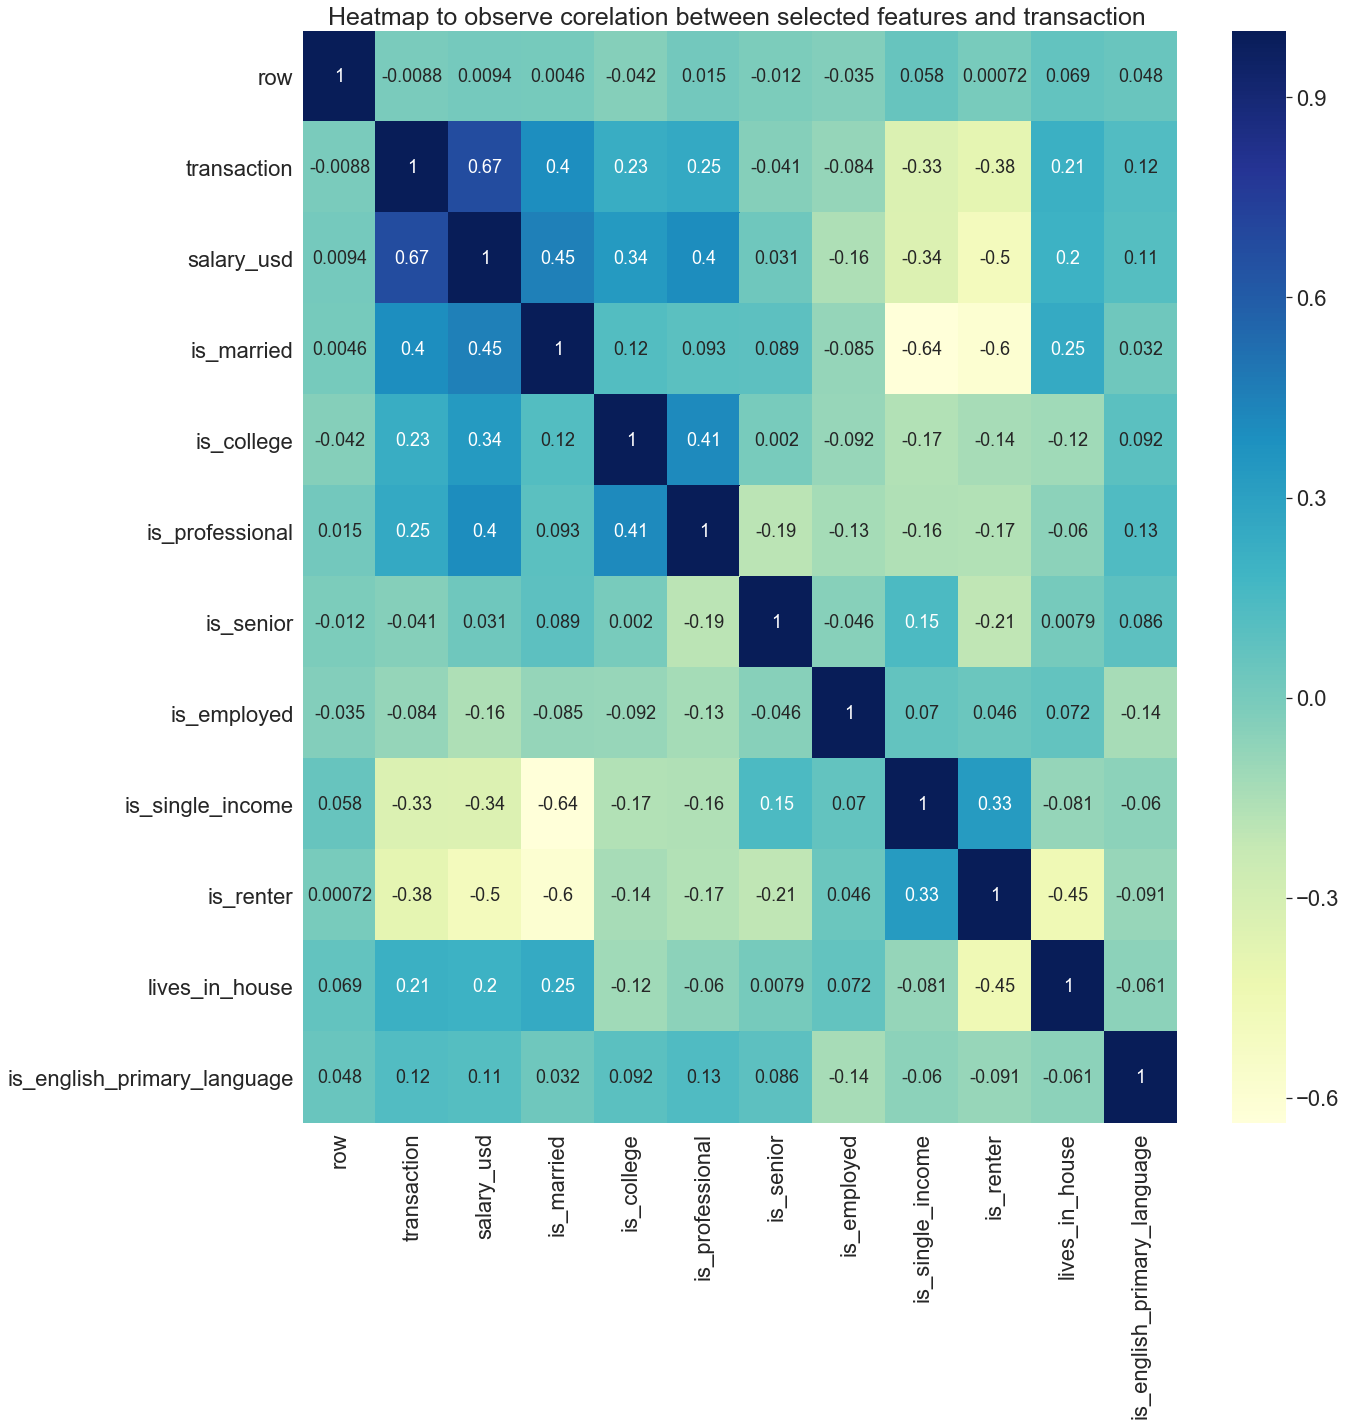

In [186]:
#get correlations of each features in dataset
corrmat = Imp_feat.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#matplotlib.rc('xtick', labelsize=15) 
#matplotlib.rc('ytick', labelsize=15) 

sns.set(font_scale=2)
#plot heat map

ax=sns.heatmap(Imp_feat[top_corr_features].corr(),annot=True,cmap="YlGnBu", annot_kws={"size":18})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Heatmap to observe corelation between selected features and transaction ', y=2, fontsize=25)
#plt.title('Correlation plot',fontsize=17)

<h1>Graphs</h1>


- <i>Bar plot to show the transaction</i>
<p>Reference: https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-python</p>

In [106]:
transaction = df[(df['transaction'] != 0)]
no_transaction = df[(df['transaction'] == 0)]

#count
trace = go.Bar(x =  ['Yes_transaction', 'No_transaction'], y = (len(transaction), len(no_transaction)), orientation = 'v', opacity = 0.8, marker=dict(
        color=['#DAF7A6', '#76D7C4'],
        line=dict(color='#000000',width=1.0)))

layout = dict(title =  'Bar plot of transaction')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

=> <i>By observing bar plot it is clear, 18% transactions are made whereas around 80% were not made. </i>

- <i>Density plot of salary</i>

Text(0.5, 1.0, 'Density plot of salary($)')

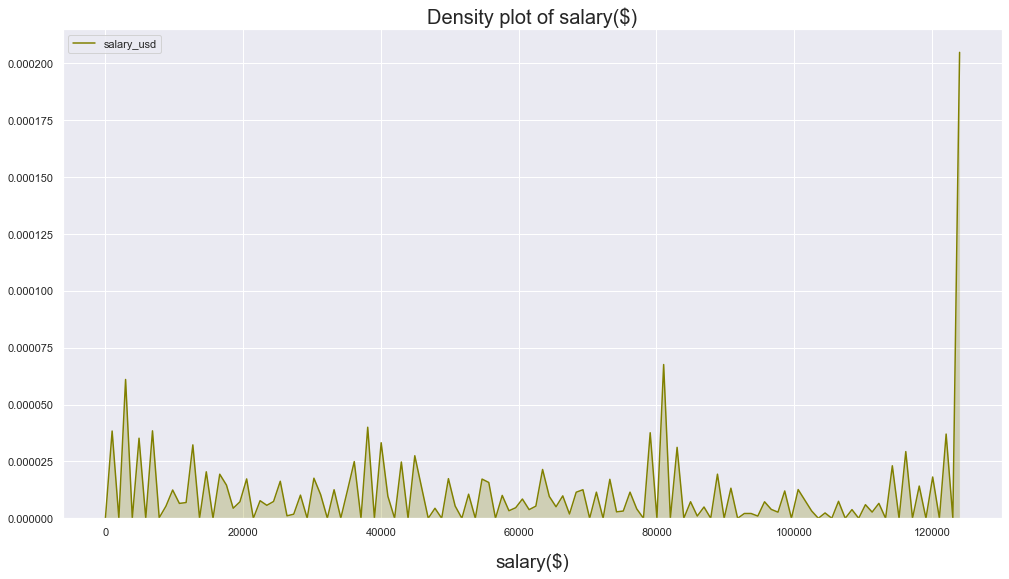

In [107]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(style='whitegrid')
#sns.set(palette='Set2')

plt.xlabel("salary($)", labelpad = 15, fontsize=19)

sns.kdeplot(df['salary_usd'], shade=True, bw=.5, color="olive")

#sns.scatterplot(x = 'salary_usd', y = 'df[salary_usd].value_counts()', data = df , s=60)
#ax = sns.countplot(df['salary_usd'])
plt.title("Density plot of salary($)", fontsize=20)


=> Maxixmum salaries are above 100k

- <i>Distplot of salary vs transaction</i>

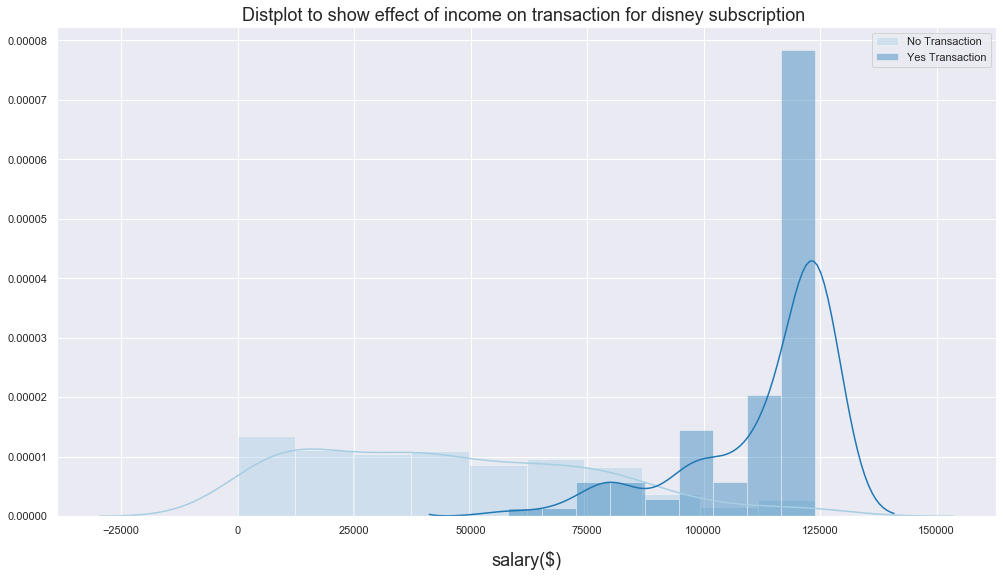

In [115]:
data0 = df['salary_usd'].loc[df['transaction']==0]
data1 = df['salary_usd'].loc[df['transaction']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(15,9))
sns.set(style='whitegrid')
sns.set(palette='Paired')

ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)

plt.title("Distplot to show effect of income on transaction for disney subscription ", fontsize=18)
plt.xlabel("salary($)", labelpad = 15, fontsize=18)

plt.legend(['No Transaction','Yes Transaction'])

=> By looking at the above dist plot, we observe that people who has salaries below $55,000 do not by the disney subscription and people who have more than $60,000 income tend to buy the subscription. 
=>The highest number of Disney subscritons are purchased by the people who come under the highest income group($120k)

- <i><b>Creating logistic regression</b></i>

- <i>Now, set the independent variables (represented as X) and the dependent variable (represented as y):</i>

In [178]:
Imp_feat.shape

(505, 12)

In [180]:
X = np.array(Imp_feat.loc[:, Imp_feat.columns != 'transaction'])
y = np.array(Imp_feat.loc[:, Imp_feat.columns == 'transaction'])

print('Shape of X: {}'.format(X.shape))
print('Shape of Y: {}'.format(y.shape))

Shape of X: (505, 11)
Shape of Y: (505, 1)


- <i>Then, apply train_test_split. For example, you can set the test size to 0.3, and therefore the model testing will be based on 30% of the dataset, while the model training will be based on 70% of the dataset:</i>

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)


Number transactions X_train dataset:  (353, 11)
Number transactions y_train dataset:  (353, 1)
Number transactions X_test dataset:  (152, 11)
Number transactions y_test dataset:  (152, 1)


<h3>Synthetic Minority Oversampling Technique(SMOTE)</h3>
<ul>
 <li>SMOTE uses a nearest neighbors algorithm to generate new and synthetic data to used for training the model.</li>
 <li>SMOTE synthesises new minority instances between existing (real) minority instances. </li>
 <li>As we have seen bar graph of attrition majority of the data belongs to no attrition so, to balance the data I have used SMOTE technique.</li>
</ul>

In [182]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state=2)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

X_test_res, y_test_res = smote.fit_sample(X_test,y_test)


Before OverSampling, counts of label '1': [73]
Before OverSampling, counts of label '0': [280] 

After OverSampling, the shape of train_X: (560, 11)
After OverSampling, the shape of train_y: (560,) 

After OverSampling, counts of label '1': 280
After OverSampling, counts of label '0': 280


- <i>Let us see how baseline logistic regression model performs on synthetic data points.</i>

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test_res)

<h4>Accuracy of model</h4>

In [184]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_res, y_test_res)))

Accuracy of logistic regression classifier on test set: 0.82


In [185]:
#Cross validation prediction
cv_pred = cross_val_predict(logreg,X_test_res,y_test_res,cv=5)
#Cross validation score
cv_score = cross_val_score(logreg,X_test_res,y_test_res,cv=5)
print('cross_val_score :',np.average(cv_score))

cross_val_score : 0.8094017094017094


<h4> Classification Report</h4>

In [187]:
print(classification_report(y_test_res, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78       131
           1       0.74      0.99      0.85       131

    accuracy                           0.82       262
   macro avg       0.86      0.82      0.82       262
weighted avg       0.86      0.82      0.82       262



In [188]:
#logistic model with summary
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.244783
         Iterations: 35
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.491     
Dependent Variable: y                AIC:              269.2309  
Date:               2020-05-03 11:37 BIC:              315.7011  
No. Observations:   505              Log-Likelihood:   -123.62   
Df Model:           10               LL-Null:          -242.69   
Df Residuals:       494              LLR p-value:      1.6755e-45
Converged:          0.0000           Scale:            1.0000    
No. Iterations:     35.0000                                      
------------------------------------------------------------------
         Coef.    Std.Err.     z     P>|z|     [0.025      0.975] 
------------------------------------------------------------------
x1       -0.0010    0.0008  -1.1912  0.2336     -0.0027     0.0006
x2        0.0001    0.0000   8.2113  0.0000      0.0000     0.0001
x3       -1.1157    0.4531  -2.

<h4>Confusion Matrix</h4>

- <i>It helps to asses the performance of classifier</i>

In [189]:
confusion_matrix = confusion_matrix(y_test_res, y_pred)
print(confusion_matrix)

[[ 85  46]
 [  1 130]]


<P>=>True Positive(TP)= 85</P>
<P>=>True Negative(TN)= 130</P>
<P>=>False Positive(FP)= 46</P>
<P>=>False Negative(NP)= 1</P>

- <i>Heat map of confusion matrix</i>

Text(24.1, 0.5, 'Actual label')

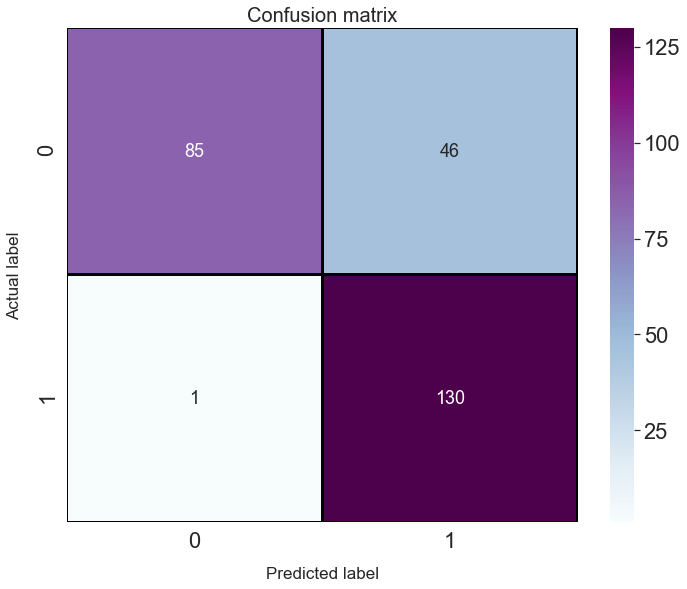

In [191]:
#heatmap 
class_names=[0,1]
plt.figure(figsize=(10,8))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.set(font_scale=2)

sns.heatmap(pd.DataFrame(confusion_matrix),  cmap="BuPu", annot=True,fmt="d", linewidths=2, linecolor='black',annot_kws={"size":18})

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.5, fontsize=20)
plt.xlabel('Predicted label', labelpad = 15, fontsize=17)
plt.ylabel('Actual label', labelpad = 15, fontsize=17)

<h3>Reciever operating characteristics (ROC)-Area under curve(AUC) score and curve</h3>

ROC score is: 0.8206106870229009


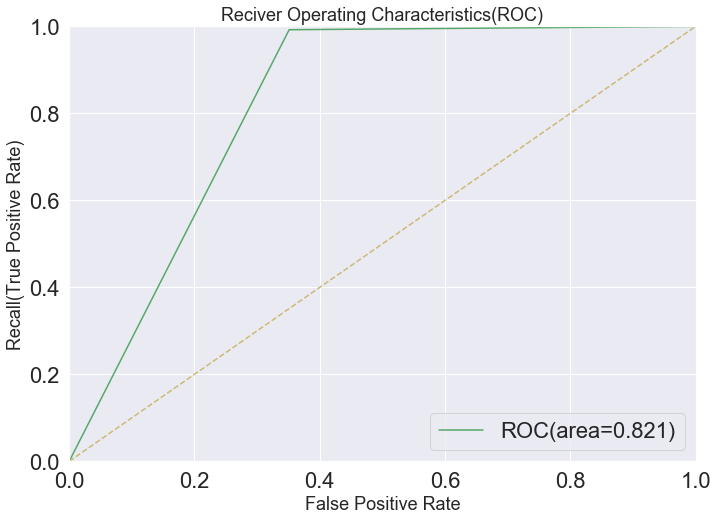

AUC: 0.8206106870229009


In [192]:
#ROC_AUC curve

roc_score = roc_auc_score(y_test_res,y_pred)
print('ROC score is:',roc_score)
plt.figure(figsize=(10,8))
false_positive_rate, recall, thresholds = roc_curve(y_test_res,y_pred)

roc_auc = auc(false_positive_rate,recall)
plt.plot(false_positive_rate,recall,'g',label='ROC(area=%0.3f)' %roc_auc)

plt.legend()
plt.plot([0,1],[0,1],'y--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])

plt.title('Reciver Operating Characteristics(ROC)', fontsize=18)
plt.ylabel('Recall(True Positive Rate)', fontsize=18 )
plt.xlabel('False Positive Rate',fontsize=18)
plt.show()
print('AUC:',roc_auc)

<h2>Testing model using sample data</h2>

In [193]:
logreg.predict(X_test_res)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [194]:
logreg.score(X_test_res,y_test_res)

0.8206106870229007

In [195]:
logreg.predict_proba(X_test_res)

array([[0.22340983, 0.77659017],
       [0.84987414, 0.15012586],
       [0.90778367, 0.09221633],
       [0.79711689, 0.20288311],
       [0.78890221, 0.21109779],
       [0.1333708 , 0.8666292 ],
       [0.95834026, 0.04165974],
       [0.65022754, 0.34977246],
       [0.19490377, 0.80509623],
       [0.46531823, 0.53468177],
       [0.5705811 , 0.4294189 ],
       [0.15376092, 0.84623908],
       [0.04901616, 0.95098384],
       [0.72220212, 0.27779788],
       [0.09906215, 0.90093785],
       [0.92408823, 0.07591177],
       [0.39780527, 0.60219473],
       [0.84774974, 0.15225026],
       [0.84694322, 0.15305678],
       [0.38921794, 0.61078206],
       [0.94494302, 0.05505698],
       [0.45209709, 0.54790291],
       [0.8719074 , 0.1280926 ],
       [0.34675138, 0.65324862],
       [0.08818049, 0.91181951],
       [0.13994924, 0.86005076],
       [0.92452952, 0.07547048],
       [0.09075287, 0.90924713],
       [0.17220772, 0.82779228],
       [0.67798292, 0.32201708],
       [0.

- <i>Generated five sample predictions for input values of my choose</i>

In [198]:
#Now, let's use the model to predict funeral plot purchases for arbitray values
arbitrary_values1 = pd.DataFrame(data = {'row':[93,672,463,546,672]})
arbitrary_values2 = pd.DataFrame(data = {'salary_usd': [7000,124000,84000,25000,124000]})
arbitrary_values3 = pd.DataFrame(data = {'is_married':[0,1,0,1,0]})
arbitrary_values4 = pd.DataFrame(data = {'is_college':[0,1,0,1,1]})
arbitrary_values5 = pd.DataFrame(data = {'is_professional': [0,1,1,1,1]})
arbitrary_values6 = pd.DataFrame(data = {'is_senior':[0,0,1,1,0]})
arbitrary_values7 = pd.DataFrame(data = {'is_employed':[1,1,0,0,1]})
arbitrary_values8 = pd.DataFrame(data = {'is_single_income': [1,1,0,1,1]})
arbitrary_values9 = pd.DataFrame(data = {'is_renter':[1,1,0,1,1]})
arbitrary_values10 = pd.DataFrame(data = {'lives_in_house':[0,1,1,1,1]})
arbitrary_values11 = pd.DataFrame(data = {'is_english_primary_language':[1,0,0,1,1]})


arbitrary_values_merged = arbitrary_values1.join(arbitrary_values2).join(arbitrary_values3).join(arbitrary_values4).join(arbitrary_values5).join(arbitrary_values6).join(arbitrary_values7).join(arbitrary_values8).join(arbitrary_values9).join(arbitrary_values10).join(arbitrary_values11).set_index([pd.Index(arbitrary_values1.index)])
arbitrary_values_merged

final_df = arbitrary_values_merged.join(pd.DataFrame(logreg.predict(arbitrary_values_merged), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values_merged.index)]))
final_df

,row,salary_usd,is_married,is_college,is_professional,is_senior,is_employed,is_single_income,is_renter,lives_in_house,is_english_primary_language,Prediction
0,93,7000,0,0,0,0,1,1,1,0,1,0
1,672,124000,1,1,1,0,1,1,1,1,0,1
2,463,84000,0,0,1,1,0,0,0,1,0,0
3,546,25000,1,1,1,1,0,1,1,1,1,0
4,672,124000,0,1,1,0,1,1,1,1,1,1


<h1>Observation</h1>

<p>=> Above table contains sample data and predicted transactiuon values for different features. </p>
<p>=> It is apparent that prople with more salary with single income are also tend to buy Disney subscription</p>
<p>=> On the other hand, people with lower income and who are renting are not buying Disney subscription . </p>

<h4>Summary of model performance:</h4>

<p>=> Accuracy of logistic regression classifier on test set: <b>0.82</b></p>
<p>=> Cross validation score : <b>0.8094017094017094</b></p>
<p>=> Macro avg:  

<ul>  
    <li>precision 0.86 </li> 
    <li>recall    0.82 </li>  
    <li>f1-score   0.82 </li>
    <li>support    262 </li>
</ul>
<p>=> Confussion Matrix : <b>{[ 85  46]</b>
 <b>[  1 130]}</b></p>
<p>=> ROC score is: <b>0.8206</b></p>
<p>=> AUC: <b>0.8206</b></p>

<h1>Reference</h1>
<p>[1]https://www.kaggle.com/lakshmi25npathi/santander-customer-transaction-prediction-python</p>